In [2]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.preprocessing import image

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

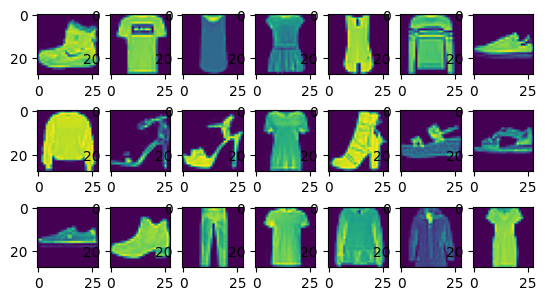

In [6]:
for i in range(21):
    plt.subplot(4,7,i+1)
    plt.imshow(x_train[i])
plt.show()

In [7]:
input_shape = (28, 28, 1)

### Тест 1_1

In [8]:
model_1_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50), # количество входных нейронов
      Dense(10)  # количество выходных нейронов
      ] )

In [9]:
model_1_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
# сразу нормализуем данные и кодируем результат в код вида 3 = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [11]:
# обучаем сразу с применением валидационной выборки
%%time

history = model_1_1.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 14s 4ms/step - loss: 9.0811 - accuracy: 0.1004 - val_loss: 9.6918 - val_accuracy: 0.1005
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 9.6768 - accuracy: 0.1006 - val_loss: 9.6918 - val_accuracy: 0.1005
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 9.6768 - accuracy: 0.1006 - val_loss: 9.6918 - val_accuracy: 0.1005
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 9.6768 - accuracy: 0.1006 - val_loss: 9.6918 - val_accuracy: 0.1005
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 9.6768 - accuracy: 0.1006 - val_loss: 9.6918 - val_accuracy: 0.1005
CPU times: user 37.4 s, sys: 2.98 s, total: 40.4 s
Wall time: 39.7 s


***Результаты печальные...***

### Тест 1_2

In [12]:
# добавим актвацию на каждом слое!
model_1_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [13]:
model_1_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
# обучаем сразу с применением валидационной выборки
%%time

history = model_1_2.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4030 - accuracy: 0.8580 - val_loss: 0.3401 - val_accuracy: 0.8722
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2747 - accuracy: 0.9005 - val_loss: 0.2842 - val_accuracy: 0.8962
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2335 - accuracy: 0.9147 - val_loss: 0.2710 - val_accuracy: 0.9007
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2035 - accuracy: 0.9242 - val_loss: 0.2914 - val_accuracy: 0.8965
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1808 - accuracy: 0.9324 - val_loss: 0.2554 - val_accuracy: 0.9140
CPU times: user 36.4 s, sys: 3.84 s, total: 40.2 s
Wall time: 36 s


***Результат сразу улучшился!***

### Тест 2

In [15]:
# сравним с простой моделью, без свёрточных слоёв
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50, activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [16]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5286 - accuracy: 0.8177 - val_loss: 0.4796 - val_accuracy: 0.8238
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3962 - accuracy: 0.8579 - val_loss: 0.4074 - val_accuracy: 0.8551
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3585 - accuracy: 0.8701 - val_loss: 0.3807 - val_accuracy: 0.8622
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3367 - accuracy: 0.8775 - val_loss: 0.3815 - val_accuracy: 0.8623
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3226 - accuracy: 0.8831 - val_loss: 0.3658 - val_accuracy: 0.8683
CPU times: user 30.9 s, sys: 3.7 s, total: 34.6 s
Wall time: 41.9 s


***У модели со свёрточным слоем результат был лучше, поэтому не будем отказываться от них!***

### Тест 3

In [18]:
# добавляем ещё один свёрточный слой
model_3 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [19]:
model_3.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
%%time

history = model_3.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4269 - accuracy: 0.8460 - val_loss: 0.3361 - val_accuracy: 0.8796
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2843 - accuracy: 0.8966 - val_loss: 0.2892 - val_accuracy: 0.8953
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2386 - accuracy: 0.9117 - val_loss: 0.2772 - val_accuracy: 0.9005
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2071 - accuracy: 0.9234 - val_loss: 0.2683 - val_accuracy: 0.9046
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1816 - accuracy: 0.9320 - val_loss: 0.2534 - val_accuracy: 0.9085
CPU times: user 41.2 s, sys: 4.2 s, total: 45.4 s
Wall time: 41.6 s


***У модели с двумя свёрточными слоями результат стал ещё лучше.***

### Тест 4

In [21]:
# добавим третий свёрточный слой
# и увеличим количество нейронов на скрытом полносвязном слое
model_4 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(128,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [22]:
model_4.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [23]:
# увеличим в два раза количество эпох
%%time

history = model_4.fit(x_train, y_train_cat, batch_size=32, epochs=10,validation_data =(x_test, y_test_cat) )


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4328 - accuracy: 0.8428 - val_loss: 0.3282 - val_accuracy: 0.8820
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2740 - accuracy: 0.8992 - val_loss: 0.2901 - val_accuracy: 0.8925
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2303 - accuracy: 0.9150 - val_loss: 0.2486 - val_accuracy: 0.9079
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2013 - accuracy: 0.9250 - val_loss: 0.2343 - val_accuracy: 0.9161
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1750 - accuracy: 0.9354 - val_loss: 0.2487 - val_accuracy: 0.9124
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1536 - accuracy: 0.9421 - val_loss: 0.2425 - val_accuracy: 0.9148
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1334 - accuracy: 0.9502 - val_loss: 0.2367 - val_accuracy

***У модели с тремя свёрточными слоями результат пока самый лучший***

### Визуализируем результат работы Модели_4

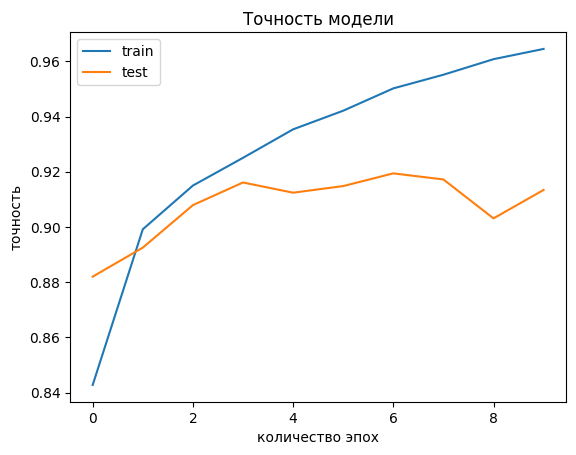

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

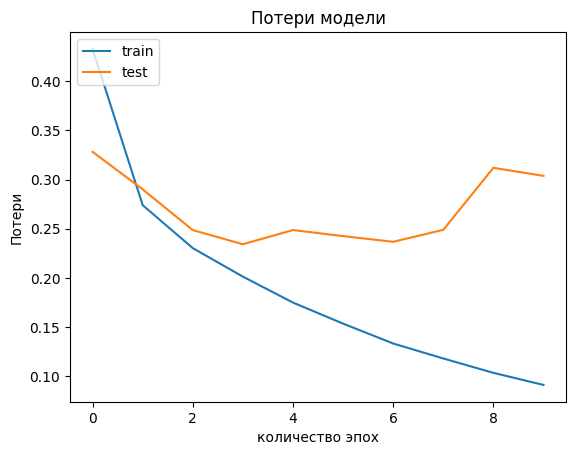

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

***На 7-й эпохе был самый лучший результат на Тестовых данных***

val_loss: 0.2367 - val_accuracy: 0.9194 <br>
После 7-й эпохи наша модель немного переобучилась.

In [27]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 3, 3, 128)        

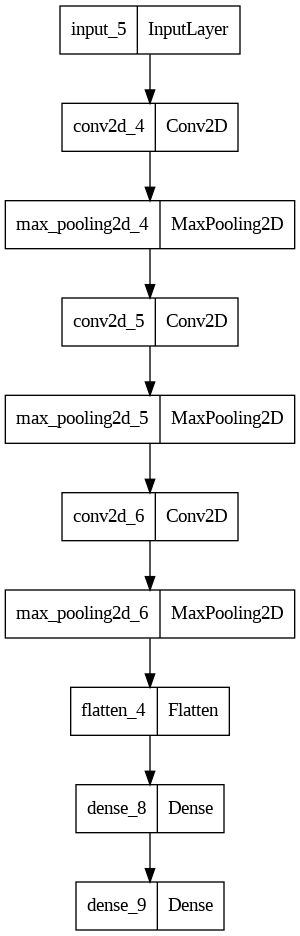

In [28]:
keras.utils.plot_model(model_4)

### 1. Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST.<br>
Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность

### Тест 5_1

Попробуем совместить лучшую Модель 3_5 из ПЗ №2 и текущую Модель_4

In [30]:
# добавим второй полносвязный скрытый слой
model_5_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(128,activation = 'relu'), # количество входных нейронов
      Dense(64,activation = 'relu'),
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [31]:
model_5_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [32]:
# увеличим размер батча в 4 раза, чтобы долго не ждать
%%time

history = model_5_1.fit(x_train, y_train_cat, batch_size=128, epochs=10, validation_data =(x_test, y_test_cat) )


Epoch 1/10
469/469 [==============================] - 6s 7ms/step - loss: 0.5606 - accuracy: 0.7957 - val_loss: 0.3600 - val_accuracy: 0.8718
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3278 - accuracy: 0.8805 - val_loss: 0.3134 - val_accuracy: 0.8869
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2747 - accuracy: 0.9013 - val_loss: 0.2928 - val_accuracy: 0.8934
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2448 - accuracy: 0.9107 - val_loss: 0.2701 - val_accuracy: 0.9000
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2192 - accuracy: 0.9189 - val_loss: 0.2527 - val_accuracy: 0.9050
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2016 - accuracy: 0.9253 - val_loss: 0.2420 - val_accuracy: 0.9138
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1807 - accuracy: 0.9336 - val_loss: 0.2552 - val_accuracy: 0.9097
Epoch 

val_loss: 0.2367 - val_accuracy: 0.9194 <br>
vs <br>
val_loss: 0.2441 - val_accuracy: 0.9151 <br>
***Результат почти не изменился***


### Тест 5_2

In [33]:
# добавим третий полносвязный скрытый слой
model_5_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(128,activation = 'relu'), # количество входных нейронов
      Dense(64, activation= 'tanh'), # немного выровняем
      Dense(64, activation= 'relu'),
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [34]:
model_5_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [35]:
# увеличим размер батча в 2 раза (а не в 4), чтобы долго не ждать
%%time

history = model_5_2.fit(x_train, y_train_cat, batch_size=64, epochs=10, validation_data =(x_test, y_test_cat) )


Epoch 1/10
938/938 [==============================] - 7s 5ms/step - loss: 0.4916 - accuracy: 0.8211 - val_loss: 0.3466 - val_accuracy: 0.8728
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2932 - accuracy: 0.8923 - val_loss: 0.2787 - val_accuracy: 0.9002
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2463 - accuracy: 0.9093 - val_loss: 0.2720 - val_accuracy: 0.9015
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2142 - accuracy: 0.9210 - val_loss: 0.2682 - val_accuracy: 0.9056
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1906 - accuracy: 0.9287 - val_loss: 0.2472 - val_accuracy: 0.9133
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1710 - accuracy: 0.9362 - val_loss: 0.2644 - val_accuracy: 0.9077
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1517 - accuracy: 0.9433 - val_loss: 0.2493 - val_accuracy: 0.9137
Epoch 

Epoch 10/10 <br>
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0913 - accuracy: 0.9645 - val_loss: 0.3037 - val_accuracy: 0.9134 <br>
CPU times: user 1min 28s, sys: 7.5 s, total: 1min 35s <br>
Wall time: 2min 23s <br>
***VS*** <br>
Epoch 10/10 <br>
938/938 [==============================] - 5s 5ms/step - loss: 0.1077 - accuracy: 0.9604 - val_loss: 0.2647 - val_accuracy: 0.9193 <br>
CPU times: user 54.5 s, sys: 4.72 s, total: 59.2 s <br>
Wall time: 1min 23s <br>

### Визуализируем результат работы Модели 5_2

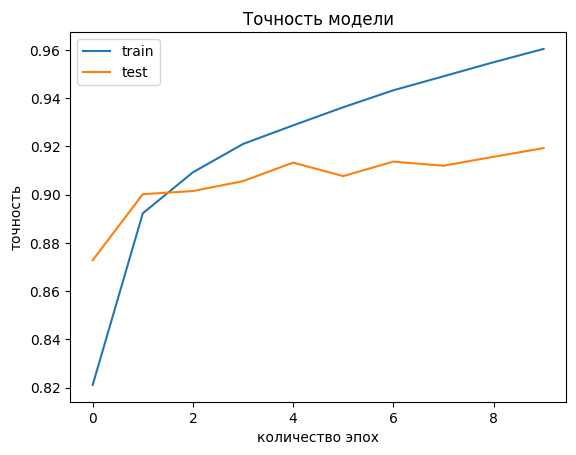

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

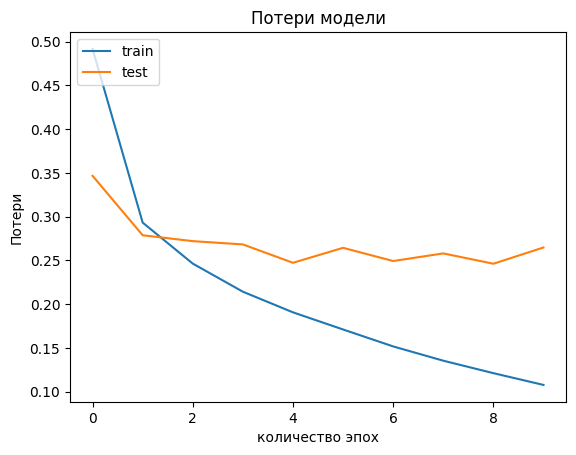

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

***На 10-й эпохе был самый лучший результат на Тестовых данных***

val_loss: 0.2367 - val_accuracy: 0.9194 <br>
vs <br>
val_loss: 0.2647 - val_accuracy: 0.9193 <br>
Результаты cхожи, но времени затрачено в 2 раза меньше!

***Таким образом удалось создать модель с другим количеством слоёв, которая работает в два раза быстрее при той же точности. <br>
Это Модель 5_2.***

### 2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow, неразобранные на уроке

В TensorFlow 2 есть команда tf.random.Generator. <br>
Это класс, который предоставляет генератор случайных чисел для создания случайных тензоров с различными распределениями. <br>
С помощью этого класса можно создавать случайные тензоры, например, с нормальным или равномерным распределением.

Базовые основные команды:  <br>
1. tf.constant(value): Создает тензор с постоянным значением.
2. tf.Variable(initial_value): Создает переменную тензора, которая может изменяться в процессе обучения.
3. tf.matmul(tensor1, tensor2): Умножает два тензора.
4. tf.nn.relu(tensor): Применяет функцию активации ReLU к тензору.
5. tf.keras.layers.Dense(units): Создает полносвязный слой с указанным количеством нейронов.
6. tf.keras.optimizers.Adam(learning_rate): Создает оптимизатор Adam с указанным коэффициентом обучения.
7. tf.keras.losses.BinaryCrossentropy(): Создает функцию потерь бинарной кросс-энтропии для бинарной классификации.
8. tf.data.Dataset.from_tensor_slices(data): Создает датасет из массива данных.